In [41]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt

## 4A

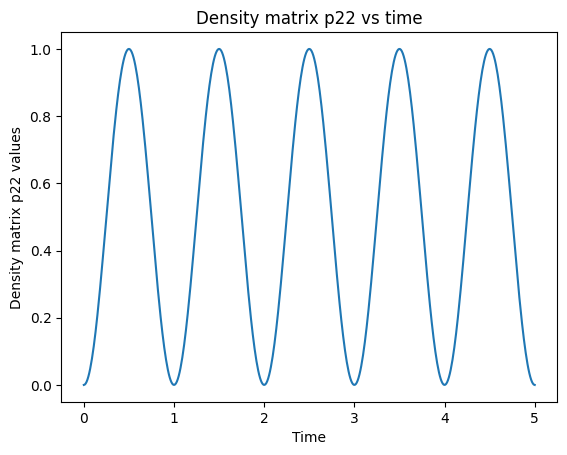

In [42]:
delta = 0
Omega = 2*np.pi

H = -delta/2 * sigmaz() + Omega / 2 * sigmax()
psi0 = fock(2,0)
rho0 = ket2dm(psi0)
tlist = np.linspace(0,5,500)

res = mesolve(H, rho0, tlist)
p22_vals = [np.abs((state * state.dag())[1,1]) for state in res.states]

plt.title("Density matrix p22 vs time")
plt.xlabel("Time")
plt.ylabel("Density matrix p22 values")
plt.plot(tlist, p22_vals)
plt.show()

## 4B

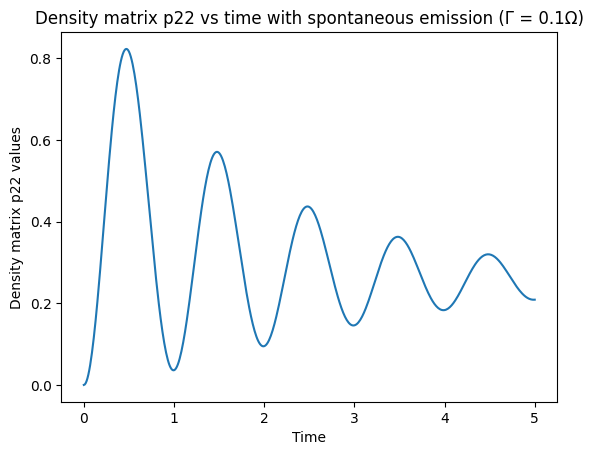

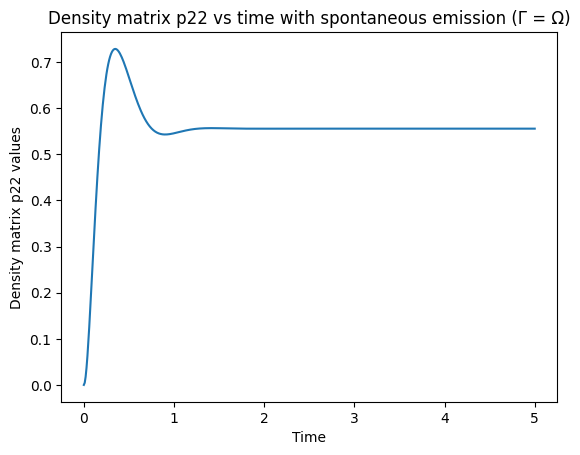

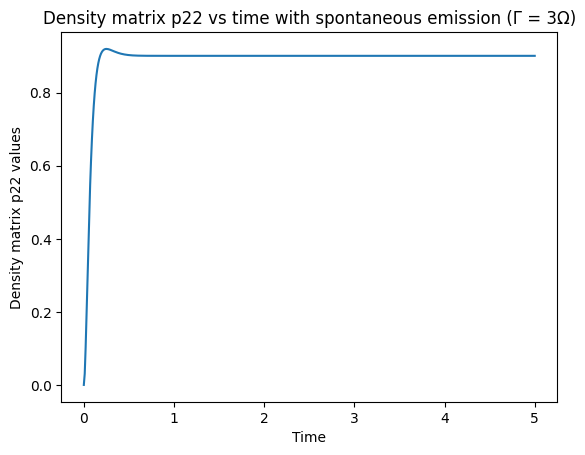

In [21]:
# Collapse operator for spontaneous emission

def plot_spontaneous_emssion(gamma, gamma_str):
    c_se = np.sqrt(gamma) * sigmam()
    res = mesolve(H, rho0, tlist, c_ops=c_se)
    p22_vals = [np.abs((state * state.dag())[1,1]) for state in res.states]
    
    plt.title("Density matrix p22 vs time with spontaneous emission (Γ = {})".format(gamma_str))
    plt.xlabel("Time")
    plt.ylabel("Density matrix p22 values")
    plt.plot(tlist, p22_vals)
    plt.show()

plot_spontaneous_emssion(0.1*Omega, "0.1Ω")
plot_spontaneous_emssion(Omega, "Ω")
plot_spontaneous_emssion(3*Omega, "3Ω")

## 4C

10.0%. Run time:   1.18s. Est. time left: 00:00:00:10
20.0%. Run time:   1.74s. Est. time left: 00:00:00:06
30.0%. Run time:   2.19s. Est. time left: 00:00:00:05
40.0%. Run time:   2.66s. Est. time left: 00:00:00:03
50.0%. Run time:   3.09s. Est. time left: 00:00:00:03
60.0%. Run time:   3.55s. Est. time left: 00:00:00:02
70.0%. Run time:   4.02s. Est. time left: 00:00:00:01
80.0%. Run time:   4.47s. Est. time left: 00:00:00:01
90.0%. Run time:   4.92s. Est. time left: 00:00:00:00
100.0%. Run time:   5.39s. Est. time left: 00:00:00:00
Total run time:   5.43s


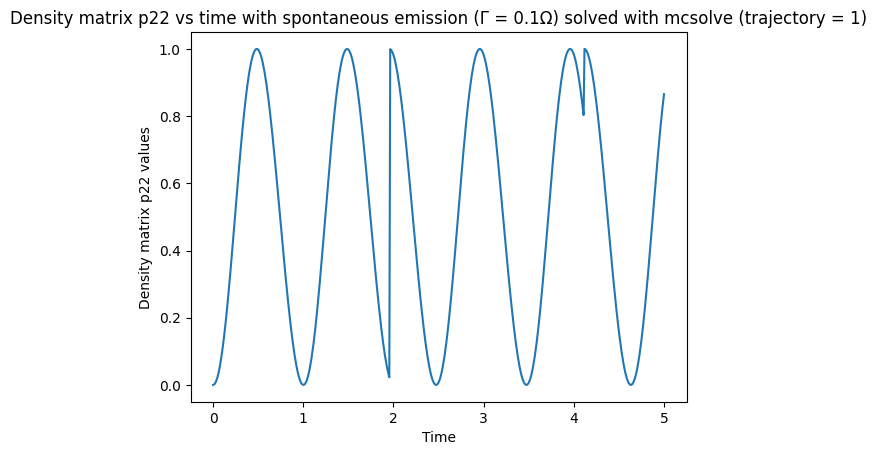

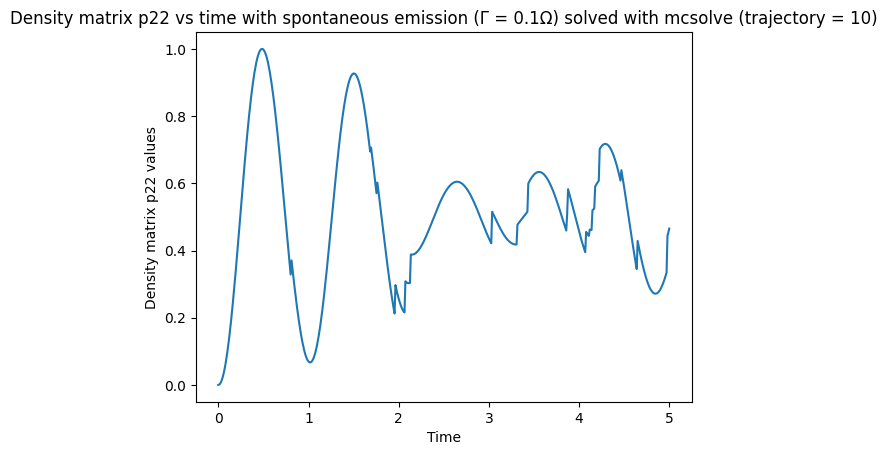

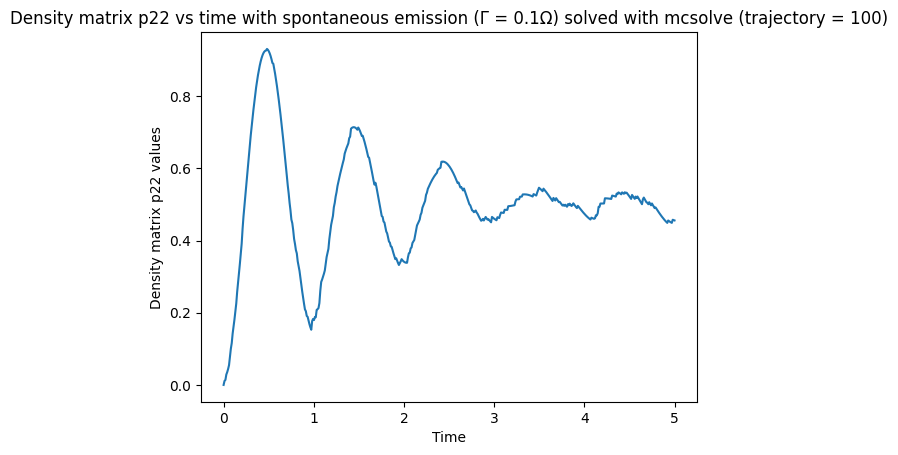

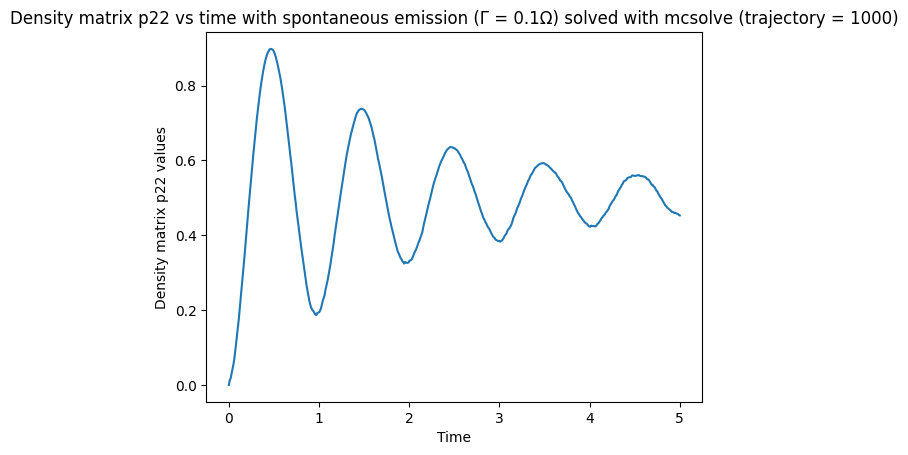

10.0%. Run time:   1.30s. Est. time left: 00:00:00:11
20.0%. Run time:   1.94s. Est. time left: 00:00:00:07
30.0%. Run time:   2.45s. Est. time left: 00:00:00:05
40.0%. Run time:   2.96s. Est. time left: 00:00:00:04
50.0%. Run time:   3.50s. Est. time left: 00:00:00:03
60.0%. Run time:   4.02s. Est. time left: 00:00:00:02
70.0%. Run time:   4.51s. Est. time left: 00:00:00:01
80.0%. Run time:   5.05s. Est. time left: 00:00:00:01
90.0%. Run time:   5.55s. Est. time left: 00:00:00:00
100.0%. Run time:   6.05s. Est. time left: 00:00:00:00
Total run time:   6.08s


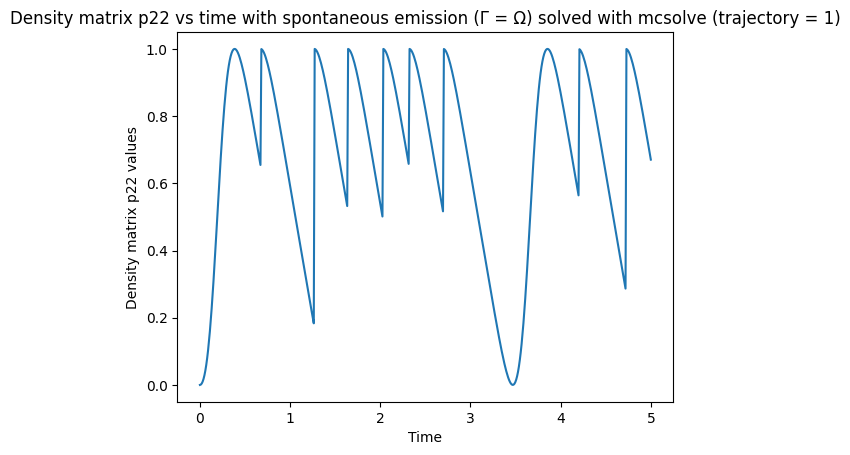

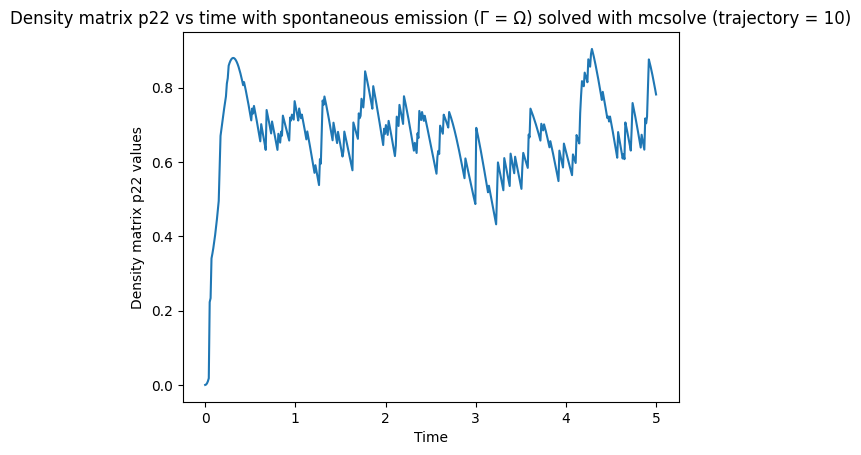

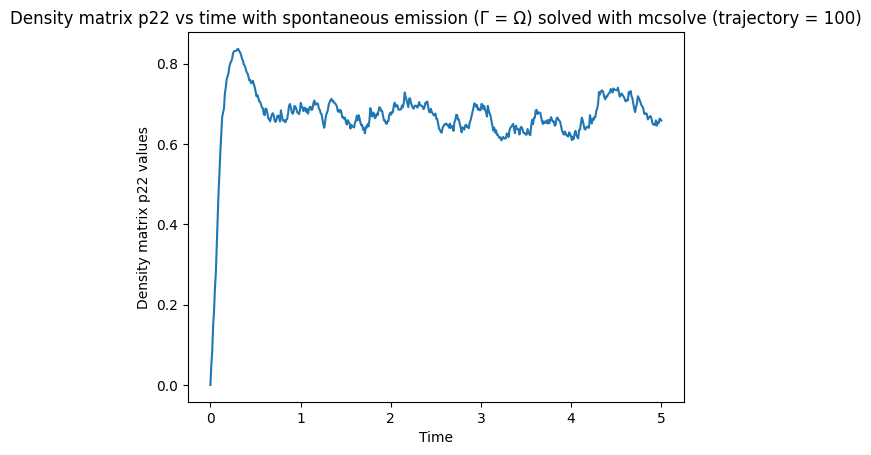

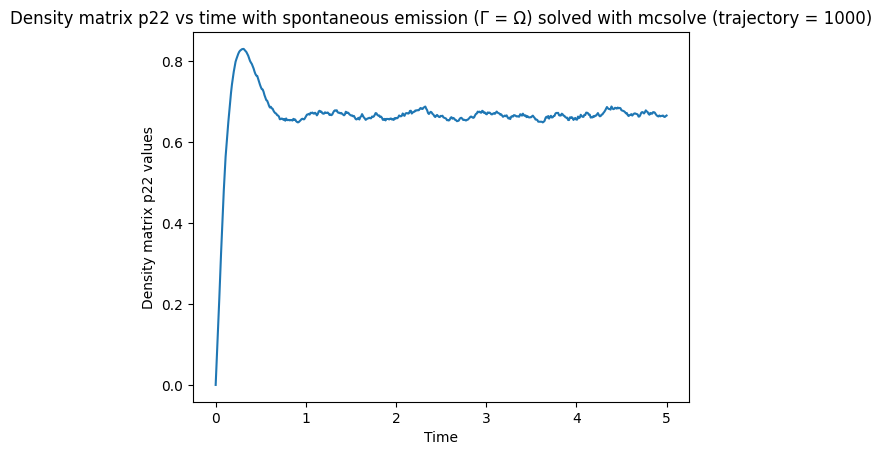

10.0%. Run time:   1.32s. Est. time left: 00:00:00:11
20.0%. Run time:   1.96s. Est. time left: 00:00:00:07
30.0%. Run time:   2.45s. Est. time left: 00:00:00:05
40.0%. Run time:   3.01s. Est. time left: 00:00:00:04
50.0%. Run time:   3.55s. Est. time left: 00:00:00:03
60.0%. Run time:   4.08s. Est. time left: 00:00:00:02
70.0%. Run time:   4.62s. Est. time left: 00:00:00:01
80.0%. Run time:   5.16s. Est. time left: 00:00:00:01
90.0%. Run time:   5.66s. Est. time left: 00:00:00:00
100.0%. Run time:   6.18s. Est. time left: 00:00:00:00
Total run time:   6.21s


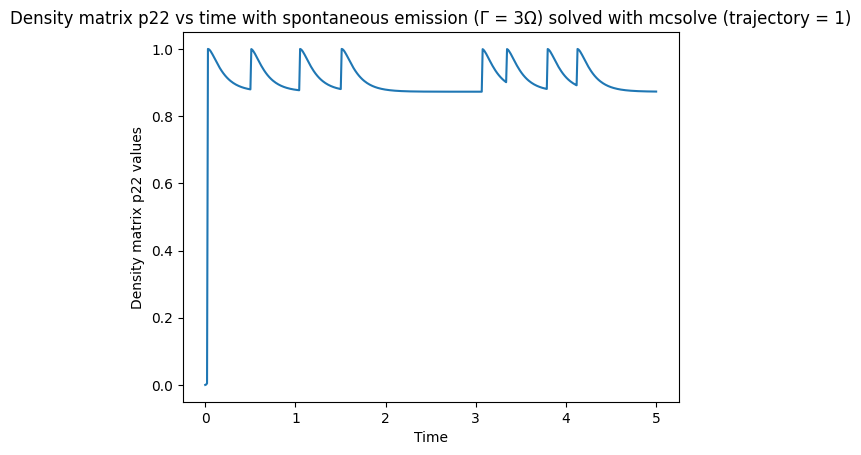

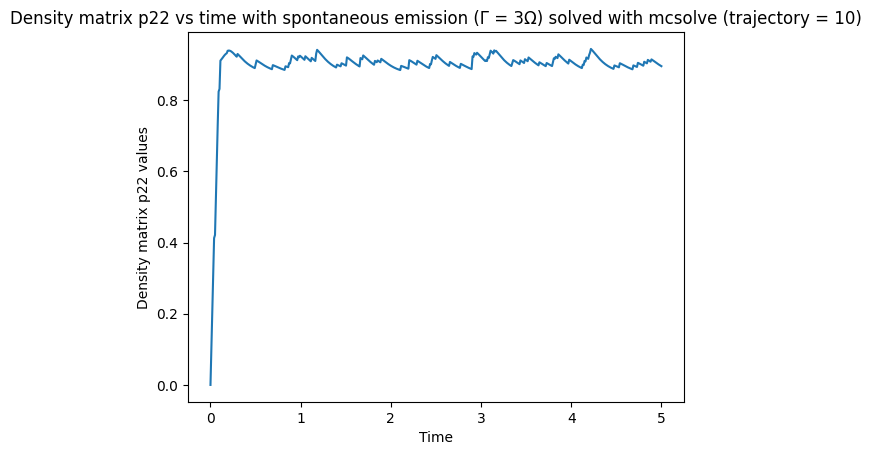

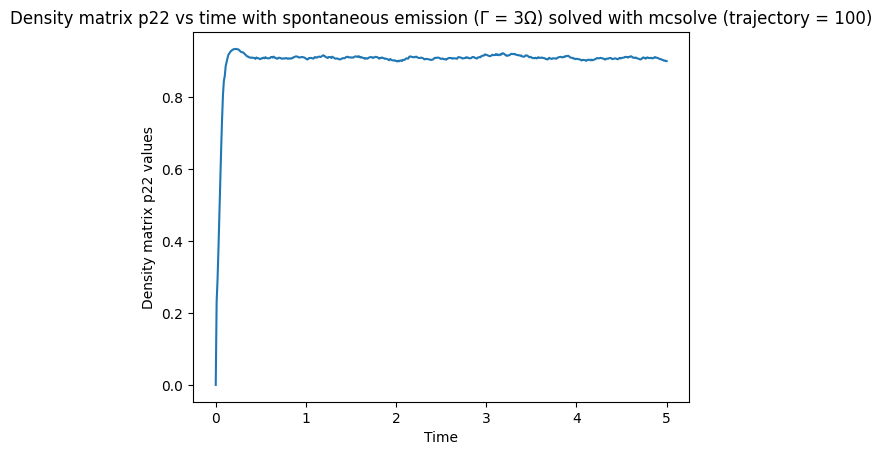

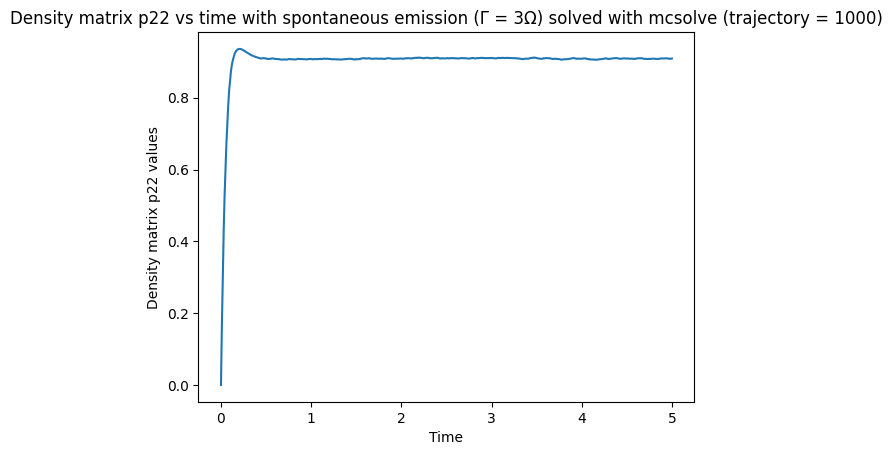

In [40]:
def plot_spontaneous_emssion_mcsolve(gamma, gamma_str):
    c_se = np.sqrt(gamma) * sigmam()
    e_11 = ket2dm(fock(2,1))

    ntraj = [1, 10, 100, 1000]


    res = mcsolve(H, psi0, tlist, c_ops=c_se, e_ops=e_11, ntraj=ntraj)

    count = 0
    for traj in ntraj:
        plt.title("Density matrix p22 vs time with spontaneous emission (Γ = {}) solved with mcsolve (trajectory = {})".format(gamma_str, traj))
        plt.xlabel("Time")
        plt.ylabel("Density matrix p22 values")
        plt.plot(tlist, res.expect[count][0])
        plt.show()

        count+=1

plot_spontaneous_emssion_mcsolve(0.1*Omega, "0.1Ω")
plot_spontaneous_emssion_mcsolve(Omega, "Ω")
plot_spontaneous_emssion_mcsolve(3*Omega, "3Ω")